<a href="https://colab.research.google.com/github/SeshuKanda/DL-_Lab/blob/main/exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
(x_train,y_train), (x_test, y_test) =reuters.load_data(num_words=10000)
len(x_train),len(x_test)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)
num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20,batch_size=512, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.3813 - loss: 2.7645 - val_accuracy: 0.6714 - val_loss: 1.4682
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.6696 - loss: 1.4040 - val_accuracy: 0.6915 - val_loss: 1.2720
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.7382 - loss: 1.1317 - val_accuracy: 0.7582 - val_loss: 1.1078
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.7888 - loss: 0.9303 - val_accuracy: 0.7649 - val_loss: 1.0303
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.8148 - loss: 0.7917 - val_accuracy: 0.7743 - val_loss: 0.9671
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - accuracy: 0.8396 - loss: 0.6752 - val_accuracy: 0.7836 - val_loss: 0.9479
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.8663 - loss: 0.5776 - val_accuracy: 0.7925 - val_loss: 0.9101
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.8770 - loss: 0.5069 - val_accuracy: 0.

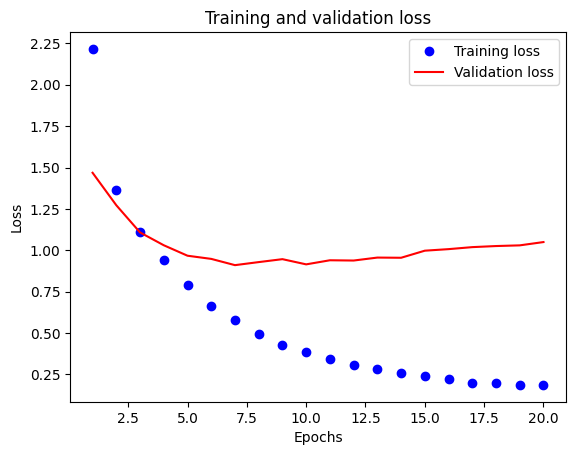

In [30]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

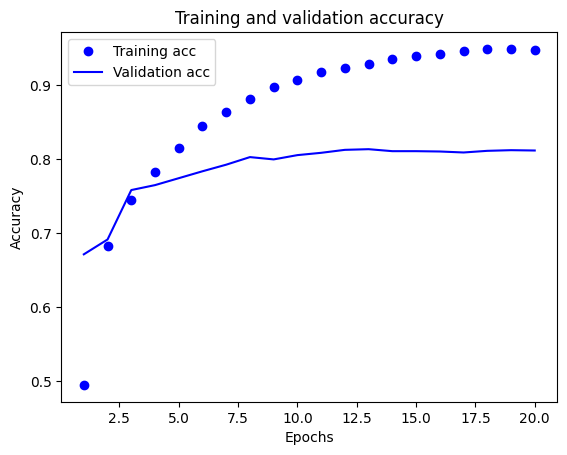

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Generate a classification report
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Confusion Matrix:
 [[ 8  1  0 ...  0  0  0]
 [ 0 85  0 ...  0  0  0]
 [ 0  1 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.69      0.81      0.75       105
           2       0.81      0.65      0.72        20
           3       0.92      0.94      0.93       813
           4       0.82      0.89      0.85       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.72      0.74      0.73        38
           9       0.83      0.76      0.79        25
          10       0.93      0.90      0.92        30
          11       0.66      0.76      0.70        83
          12       0.50      0.23      0.32        13
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
